<a href="https://colab.research.google.com/github/Muyiiwaa/deep-learning-from-here/blob/master/Neural_network_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importing the required libraries

import numpy as np
import math

import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# load the handwritten digits dataset

(X_train, y_train), (X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# Explore the image dataset

X_train.shape

(60000, 28, 28)

In [5]:
X_train[0].shape

(28, 28)

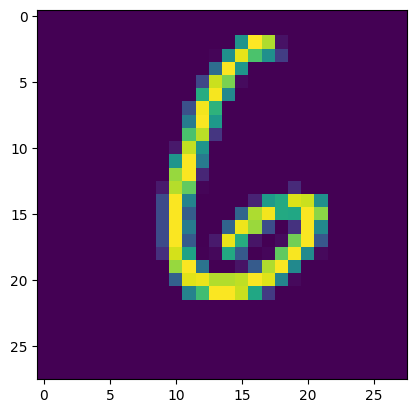

In [6]:
# visualising the image

plt.imshow(X_train[32])


In [7]:
y_train[32]

6

In [8]:
# flattening the array

X_train_flat = X_train.reshape(len(X_train), (28 * 28))

X_train_flat.shape

(60000, 784)

In [9]:
X_train_flat[0].shape

(784,)

In [10]:
# train the first instance neural network with an input and output layer

model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flat, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 9.4982 - accuracy: 0.8410
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 6.1903 - accuracy: 0.8782
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.7704 - accuracy: 0.8817
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.5903 - accuracy: 0.8865
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.4531 - accuracy: 0.8852


In [11]:
# making the neural net better.

# normalizing the training data
print(max(X_train_flat[0]))
X_train_norm = X_train_flat/255

model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_norm, y_train, epochs = 5)

255
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4681 - accuracy: 0.8765
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3037 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2836 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2728 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2665 - accuracy: 0.9262


In [12]:
# evaluating the model on the test set

X_test_flat = X_test.reshape(len(X_test), 28*28)

model.evaluate(X_test_flat, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 48.0393 - accuracy: 0.9142


[48.03928756713867, 0.9142000079154968]

In [13]:
predictions = model.predict(X_test_flat)


313/313 [==============================] - 1s 2ms/step


In [14]:
len(predictions[0])


10

In [15]:
# visualising all the probabilities of the outcome
for _ in predictions[3]:
  print(_)

1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [16]:
# converting individual predictions to an actual digit
np.argmax(predictions[3])

0

Text(50.722222222222214, 0.5, 'Predicted Value')

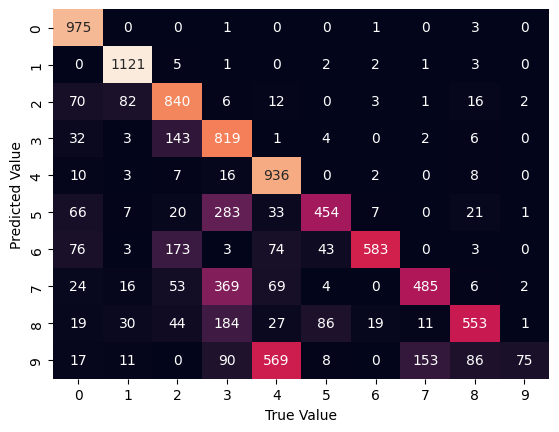

In [17]:
# Evaluate the model

preds = [np.argmax(x) for x in predictions]

confusion = tf.math.confusion_matrix(labels= y_test, predictions=preds)

sns.heatmap(confusion, annot = True, cbar = False, fmt = '0.0f')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')

In [18]:
predictions.shape

(10000, 10)

In [19]:
y_test.shape

(10000,)

In [20]:
predictions[0]

array([0., 0., 0., 1., 0., 0., 0., 1., 0., 1.], dtype=float32)

### Strategy on Improvement

1. Try other normalization technique
2. Try other loss, optimizer and activation function
3. Add more layers to the neural network

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_flat)
# X_test_scaled = scaler.fit_transform(X_test_flat)

model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])

model.compile(

    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_scaled, y_train, epochs = 5)

model.evaluate(X_test_flat, y_test)

preds_array = model.predict(X_test_flat)

predss = [np.argmax(x) for x in preds_array]

conf = tf.math.confusion_matrix(labels= y_test, predictions=predss)

print(f"========================================================================")
print(f'TRAINING SECOND MODEL WITH HIDDEN LAYER')
# multilayer perceptron with one hidden layer

model_hidden = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model_hidden.compile(

    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model_hidden.fit(X_train_norm, y_train, epochs = 5)

model_hidden.evaluate(X_test_flat, y_test)

preds_array = model_hidden.predict(X_test_flat)

predss = [np.argmax(x) for x in preds_array]

conf_hidden = tf.math.confusion_matrix(labels= y_test, predictions=predss)



Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4297 - accuracy: 0.8861
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3285 - accuracy: 0.9181
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3046 - accuracy: 0.9223
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2871 - accuracy: 0.9253
Epoch 5/5
313/313 [==============================] - 0s 1ms/step
TRAINING SECOND MODEL WITH HIDDEN LAYER
Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2692 - accuracy: 0.9241
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1201 - accuracy: 0.9650
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0850 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0657 - accuracy: 0.9800
Epoch 5/5
313/313 [==============================] - 1s 2ms/step


Text(0.5, 1.0, 'SCALED MODEL - SINGLELAYER')

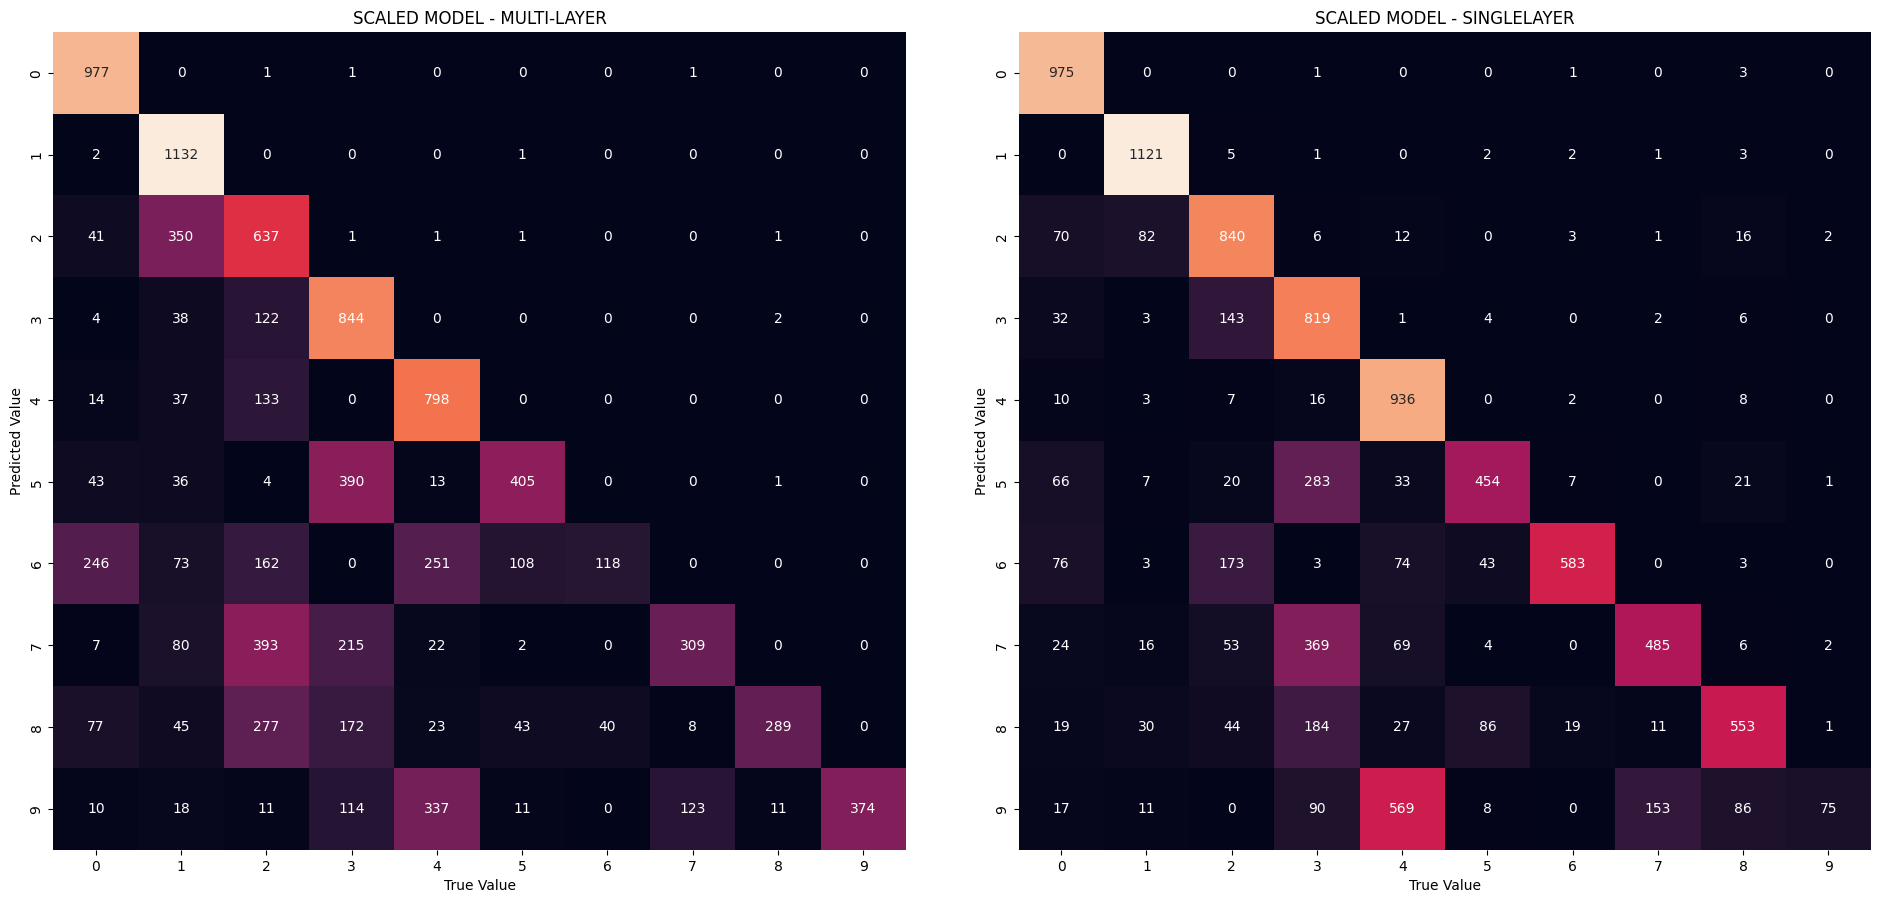

In [35]:

fig, axes = plt.subplots(1,2, figsize = (20,10))
sns.heatmap(conf_hidden, annot = True, cbar = False, fmt = '0.0f', ax = axes[0])
sns.heatmap(confusion, annot = True, cbar = False, fmt = '0.0f', ax = axes[1])
axes[0].set_xlabel('True Value')
axes[0].set_ylabel('Predicted Value')
axes[1].set_xlabel('True Value')
axes[1].set_ylabel('Predicted Value')

fig.tight_layout(pad = 5)

axes[0].set_title('SCALED MODEL - MULTI-LAYER')
axes[1].set_title('SCALED MODEL - SINGLELAYER')
